In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files dare available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
local_dir = "../input/"

import os
# print(os.listdir(local_dir))

import glob
csv_file = glob.glob(local_dir+'*.csv')
print (csv_file)
# Any results you write to the current directory are saved as output.

['../input/periods_train.csv', '../input/periods_test.csv', '../input/train_active.csv', '../input/test.csv', '../input/test_active.csv', '../input/train.csv']


### Data description

train.csv - Train data.
item_id - Ad id.
user_id - User id.
region - Ad region.
city - Ad city.
parent_category_name - Top level ad category as classified by Avito's ad model.
category_name - Fine grain ad category as classified by Avito's ad model.
param_1 - Optional parameter from Avito's ad model.
param_2 - Optional parameter from Avito's ad model.
param_3 - Optional parameter from Avito's ad model.
title - Ad title.
description - Ad description.
price - Ad price.
item_seq_number - Ad sequential number for user.
activation_date- Date ad was placed.
user_type - User type.
image - Id code of image. Ties to a jpg file in train_jpg. Not every ad has an image.
image_top_1 - Avito's classification code for the image.
deal_probability - The target variable. This is the likelihood that an ad actually sold something. It's not possible to verify every transaction with certainty, so this column's value can be any float from zero to one.

__notice__:
    
    1. interpretation of param_1, _2, and _3?

    2. price should be categorized with parent_category!
    
    3. data_placed: mind the weekday or weekends of post data affect the dp!
    
    4. what is the user_type?
    
    5. 

### Data Exploration

combine the training and testing data into list to do manipulation the same time
** discription data**
full_des = [train_active, test_active]

target column is the deal_probability 





In [2]:
train_dp = pd.read_csv(local_dir+'train.csv', parse_dates=["activation_date"])
test_dp= pd.read_csv(local_dir+'test.csv', parse_dates=["activation_date"])
full_dp = [train_dp,test_dp]

In [3]:
train_dp.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


# print description info

In [4]:
# print percentage of NA value in each column
print ('Training Data')
train_summary = pd.DataFrame({'DataType': train_dp.dtypes,
                              'Non_Na':train_dp.notnull().sum(),
                              '% NULL':train_dp.isnull().mean(),
                              'Unique_values': train_dp.apply(lambda x: len(x.unique()))
                             })  

print (train_summary)
print ('*'*30)
print ('Testing Data')
test_summary = pd.DataFrame({'DataType': test_dp.dtypes,
                             'Not_Na':test_dp.notnull().sum(),
                              '%NULL':test_dp.isnull().mean(),
                              'Unique_values': test_dp.apply(lambda x: len(x.unique()))
                             })  
print (test_summary)

Training Data
                        % NULL        DataType   Non_Na  Unique_values
item_id               0.000000          object  1503424        1503424
user_id               0.000000          object  1503424         771769
region                0.000000          object  1503424             28
city                  0.000000          object  1503424           1733
parent_category_name  0.000000          object  1503424              9
category_name         0.000000          object  1503424             47
param_1               0.040957          object  1441848            372
param_2               0.435368          object   848882            272
param_3               0.573734          object   640859           1220
title                 0.000000          object  1503424         788377
description           0.077341          object  1387148        1317103
price                 0.056778         float64  1418062          17007
item_seq_number       0.000000           int64  1503424        

## Deal Probability

__defination__: The target variable. This is the likelihood that an ad actually sold something. It's not possible to verify every transaction with certainty, so this column's value can be any float from zero to one.


/home/zehai/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


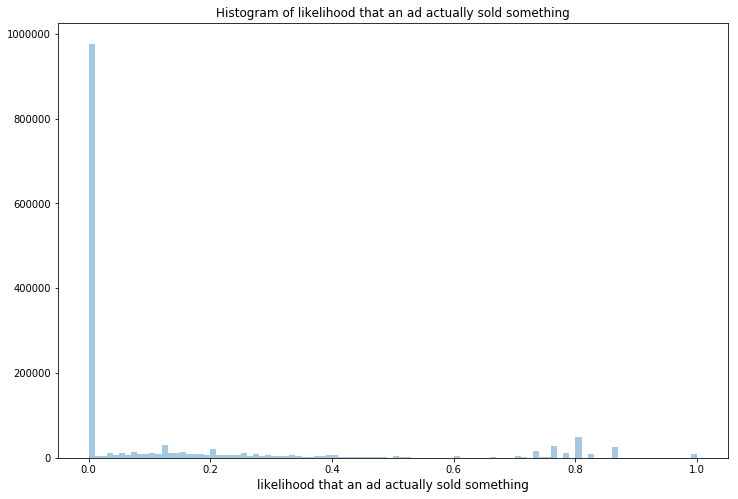

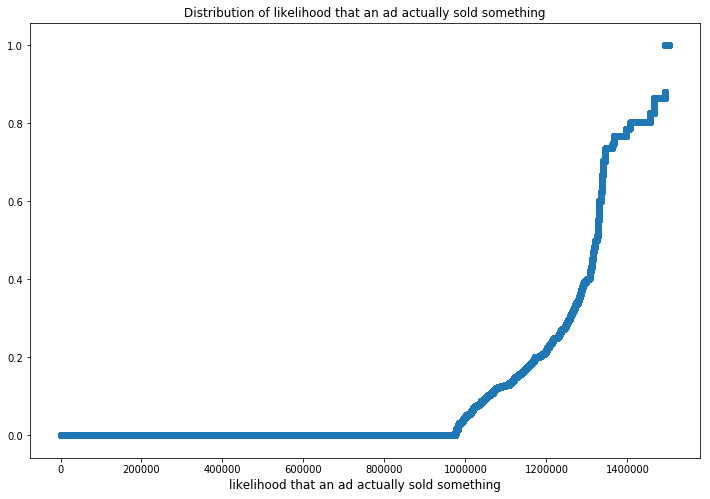

In [5]:
plt.figure(figsize=(12,8))

sns.distplot(train_dp['deal_probability'], bins =100, kde = False)
plt.xlabel('likelihood that an ad actually sold something', fontsize=12)
plt.title("Histogram of likelihood that an ad actually sold something")
plt.show() 
plt.figure(figsize = (12, 8))
plt.scatter(range(train_dp.shape[0]), np.sort(train_dp.deal_probability.values))
plt.xlabel('likelihood that an ad actually sold something', fontsize=12)
plt.title("Distribution of likelihood that an ad actually sold something")
plt.show()

## It is interesting to view if there is full overlapping of training and testing data

Here we can see, as expected "region", "parent_cate", "cate",

In [6]:
train_summary.index

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

In [7]:
joint_df = train_dp.append(test_dp)[test_dp.columns.tolist()]
joint_summary = pd.DataFrame({
                              'Unique_values': joint_df.apply(lambda x: len(x.unique()))
                             }) 
joint_summary['OverLapping_Data'] = train_summary['Unique_values']+test_summary['Unique_values']-joint_summary['Unique_values']
joint_summary['%_in_trainning']= joint_summary['OverLapping_Data']/train_summary['Unique_values']*100
joint_summary['%_in_test']= joint_summary['OverLapping_Data']/test_summary['Unique_values']*100
joint_summary.round(2)


,Unique_values,OverLapping_Data,%_in_trainning,%_in_test
item_id,2011862,0.0,0.00,0.00
user_id,1009909,67929.0,8.80,22.19
region,28,28.0,100.00,100.00
city,1752,1625.0,93.77,98.84
parent_category_name,9,9.0,100.00,100.00
category_name,47,47.0,100.00,100.00
param_1,372,362.0,97.31,100.00
param_2,278,250.0,91.91,97.66
param_3,1277,917.0,75.16,94.15
title,1022203,64213.0,8.14,21.55


In [8]:
train_user_id = train_dp['user_id'].tolist()
test_user_id = test_dp['user_id'].tolist()
shared_id = np.intersect1d(train_user_id,test_user_id)

### No overlapping of items but same users in training and testing group
### Cities not overlapping in training and test data
### Posted data are data from one month|

## Observations

   ### Catagorical Features

    suitable catagorical features are:
                       
                           1. __region__,
                           2. __parent_category_name__,
                           3. __category_name__
                           4. __user_type__
   
  

### Overlapping Image
The over lapping data is Na

### 1 Region data

The translation data comes from [sban's kernel](https://www.kaggle.com/shivamb/in-depth-analysis-visualisations-avito/code)

In [9]:
# @hidden_cell
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

In [10]:
# map translation to the trainning data\
for df in full_dp:
    df['region_en'] = df['region'].apply(lambda x : region_map[x])
    df['parent_category_name_en'] = df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
    df['category_name_en'] = df['category_name'].apply(lambda x : category_map[x])

In [11]:
# snap_shot of the training data
train_dp.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,region_en,parent_category_name_en,category_name_en
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,Sverdlovsk oblast,Personal belongings,Children's products and toys
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,Samara oblast,For the home and garden,Furniture and interior
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,Rostov oblast,Consumer electronics,Audio and video
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,Tatarstan,Personal belongings,Children's products and toys
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,Volgograd oblast,Transport,Cars


In [12]:
print(train_dp.image[100])

2707593481ee0d272038e87763ca30bbea7f48939e45ab19571d9784e38ea52a


### The major challenge for this dataset is to make sence of Russian vocabulary

- Either get translation API to translated in to English
- Deal with synnonymous in Russian database

In [13]:
# how many category_name does test and train data possess
cata_group = train_dp[['item_id','parent_category_name_en']].groupby('parent_category_name_en')
cata_group.count()

,item_id
parent_category_name_en,
Animals,52470
Consumer electronics,173008
For business,18075
For the home and garden,178823
Hobbies & leisure,86011
Personal belongings,697623
Real estate,153190
Services,64385
Transport,79839


In [14]:
# how many category_name does test and train data possess
cata_group = test_dp[['item_id','parent_category_name_en']].groupby('parent_category_name_en')
cata_group.count()

,item_id
parent_category_name_en,
Animals,19976
Consumer electronics,58282
For business,6463
For the home and garden,64910
Hobbies & leisure,31271
Personal belongings,216577
Real estate,57387
Services,23619
Transport,29953


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

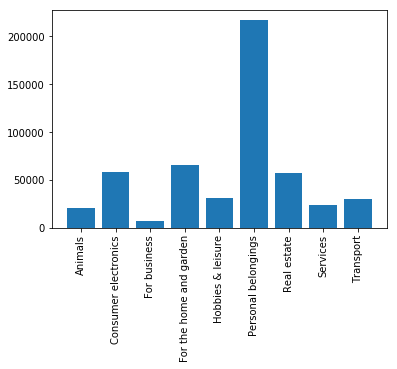

In [15]:
g = plt.bar(cata_group.count().index,cata_group.count().item_id)
plt.xticks(rotation=90)

In [ ]:
g = sns.factorplot(x="parent_category_name_en",y="deal_probability",data=train_dp,kind="bar", size = 5, aspect=2,
palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=30)
g = g.set_ylabels("deal probability")

In [ ]:
g = sns.factorplot(x="parent_category_name_en",y="price",data=train_dp,kind="bar", size = 5, aspect=2,
palette = "muted")
g.despine(left=True)
g.fig.get_axes()[0].set_yscale('log')
g.set_xticklabels(rotation=30)
g = g.set_ylabels("price (logscale)")

In [ ]:
g = sns.boxplot(x="region_en",y="deal_probability",data=train_dp,palette = "muted")
plt.xticks(rotation='vertical')

In [ ]:
g = sns.factorplot(x="user_type",y="deal_probability",data=train_dp,kind="bar", size = 5, aspect=1,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("deal probability")

In [ ]:
# # date time features
# for data in full_dp:
#     data['weekday'] = data.activation_date.dt.weekday
#     data['month'] = data.activation_date.dt.month
#     data['day'] = data.activation_date.dt.day
#     data['week'] = data.activation_date.dt.week 

In [ ]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(x="parent_category_name_en", y="deal_probability", hue="user_type",  palette="muted", data=train_dp)
plt.title("Deal probability by parent category and User Type")
plt.xticks(rotation=30)
plt.show()

In [ ]:
train_dp.head()

# Deal with NA

#### 1. Price
rescale the price by log and fill na with parent_categorical median


In [ ]:
for df in full_dp:
    df['price'] = np.log(df['price']+0.001)

In [ ]:
catagorical_meanPrice = train_dp.groupby('parent_category_name_en')['price'].mean()
catagorical_meanPrice

In [ ]:
g = sns.factorplot(x="parent_category_name_en",y="price",data=train_dp,kind="bar", size = 5, aspect=2,
palette = "muted", order =catagorical_meanPrice.index.tolist())
g.despine(left=True)
g.set_xticklabels(rotation=30)
g = g.set_ylabels("log_price")

In [ ]:
g = sns.factorplot(x="parent_category_name_en",y="price",data=test_dp,kind="bar", size = 5, aspect=2,
palette = "muted",order =catagorical_meanPrice.index.tolist())
g.despine(left=True)
g.set_xticklabels(rotation=30)
g = g.set_ylabels("log_price")

In [ ]:
g = sns.factorplot(x="category_name_en",y="price",data=train_dp,kind="bar", size = 5, aspect=2,
palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("log_price")

In [ ]:
catagorical_meanPrice = train_dp.groupby('parent_category_name_en')['price'].mean()
catagorical_meanPrice

In [ ]:
catagorical_meanPrice = test_dp.groupby('parent_category_name_en')['price'].mean()
catagorical_meanPrice

In [ ]:
def impute_median(series):
    return series.fillna(series.median())

In [ ]:
for df in full_dp:
    by_category = df.groupby('parent_category_name_en')
    df.price = by_category.price.transform(impute_median)

### 2.  Image_top1

In [ ]:
for df in full_dp:
    df["image_top_1"].fillna(-999,inplace=True)

# Create new features

Get activation weekdays from activation_date

In [ ]:
for df in full_dp:
    df["Weekday"] = df['activation_date'].dt.weekday

In [ ]:
by_weekday = train_dp.groupby('Weekday')

In [ ]:
by_weekday['deal_probability'].mean()

Tile and description words

In [ ]:
for df in full_dp:
    df["title_nwords"] = df["title"].apply(lambda x: len(x.split()))
    
    df["description"].fillna("missing", inplace=True)
    df["desc_nwords"] = df["description"].apply(lambda x: len(x.split()))


In [ ]:
train_dp.groupby('title_nwords')['deal_probability'].mean()

In [ ]:
train_dp.groupby('title_nwords')['deal_probability'].count()

In [ ]:
train_dp.groupby('desc_nwords')['deal_probability'].mean()

In [ ]:
train_dp.groupby('desc_nwords')['deal_probability'].count()

In [ ]:
# Label Encoder
# https://www.kaggle.com/him4318/avito-lightgbm-with-ridge-feature-v-2-0/code
from sklearn import preprocessing

print("\nEncode Variables")
categorical = ["user_id","region","city","parent_category_name","category_name","user_type","image_top_1","param_1","param_2","param_3"]
print("Encoding :",categorical)

# Encoder:
lbl = preprocessing.LabelEncoder()
for col in categorical:
    df[col].fillna('Unknown')
    df[col] = lbl.fit_transform(df[col].astype(str))
    
print("\nText Features")

In [ ]:
df.head()

### Try to see if user post numbers will affect the deal probability

In [ ]:
# combine use_id in train and test dataset into a list
train_pool = train_dp['user_id'].tolist()
test_pool = test_dp['user_id'].tolist()
user_pool = train_pool + test_pool 

In [ ]:
len(list(set(user_pool)))

In [ ]:
unique, counts = np.unique(user_pool, return_counts=True)

In [ ]:
np.unique(counts,return_counts=True)

The most experienced people post 1080.

In [ ]:
user_map = {key:val for (key,val) in zip(unique,counts)}

In [ ]:
for df in full_dp:
    df['user_post_num'] = df['user_id'].apply(lambda x: user_map[str(x)] if user_map[str(x)]<9 else 10)

In [ ]:
train_dp.head()

In [ ]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.barplot(x="user_post_num", y="deal_probability", hue="user_type",  palette="muted", data=train_dp)
plt.title("Deal probability by parent category and User Type")
plt.xticks(rotation=30)
plt.show()

### Get the imaging features

In [ ]:
import pickle
data_dir = "../input/"
train_feats_list = ['../input/feats_0.pkl',
 '../input/feats_1.pkl',
 '../input/feats_2.pkl',
 '../input/feats_3.pkl',
 '../input/feats_4.pkl']
train_feats = pd.DataFrame()
for pkl in train_feats_list:
    df = pd.read_pickle(pkl)
    train_feats = train_feats.append(df)
test_feats = pd.read_pickle('../input/feats_test_jpg.pkl')

In [ ]:
train_feats.info()

In [ ]:
train_dp.info()

In [ ]:
l1 = train_feats.image.tolist()
l2 = train_dp.image.tolist()

In [ ]:
len(set(l1+l2))

In [ ]:
l1

In [ ]:
l2

In [ ]:
train_feats.image.apply(lambda x: x.split('.')[0]).tolist()

In [ ]:
train_feats.image = train_feats.image.apply(lambda x: x.split('.')[0])

In [ ]:
train_dp = pd.merge(train_dp, train_feats,how='outer', on='image')

In [ ]:
train_dp.info()

In [ ]:
train_feats.columns.tolist()

In [ ]:
colormap=plt.cm.RdBu

In [ ]:
train_dp[['apw',
 'avg_blue',
 'avg_green',
 'avg_red',
 'blurrness',
 'dullness',
 'height',
 'size',
 'whiteness',
 'width']].fillna('0')

In [ ]:
train_dp.info()

In [ ]:
dp = train_dp

In [ ]:
train_dp.fillna({'apw':0,
 'avg_blue':0,
 'avg_green':0,
 'avg_red':0,
 'blurrness':100,
 'dullness':100,
 'height':0,
 'size':0,
 'whiteness':0,
 'width':0},inplace=True)

In [ ]:
corr_feats = train_dp[['apw',
 'avg_blue',
 'avg_green',
 'avg_red',
 'blurrness',
 'dullness',
 'height',
 'size',
 'whiteness',
 'width','deal_probability']]

In [ ]:
rescale_feats = [
 'blurrness',
 'dullness',
 'height',
 'size',
 'whiteness',
 'width']
for i in rescale_feats:
    train_feats[i] = train_feats[i].apply(lambda x: np.log(x+1))

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,18))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(corr_feats.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='Black', annot=True)